<a href="https://colab.research.google.com/github/raae7742/study-ml-basic/blob/main/7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련

In [2]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [4]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = 
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [7]:
model = model_fn()

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 실제로는 fit 메소드로 history 객체를 구할 수 있음
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# history 속성의 key 값을 살펴보자!
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


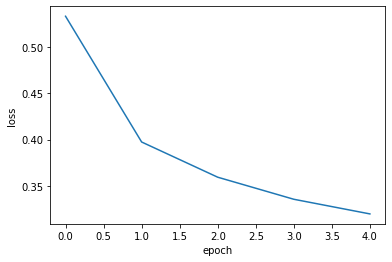

In [9]:
import matplotlib.pyplot as plt

# 손실 값
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

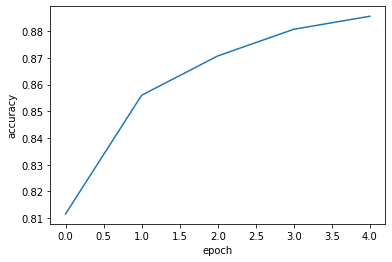

In [10]:
# 정확도
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 더 많은 에포크
history = model.fit(train_scaled ,train_target, epochs=20, verbose=0)

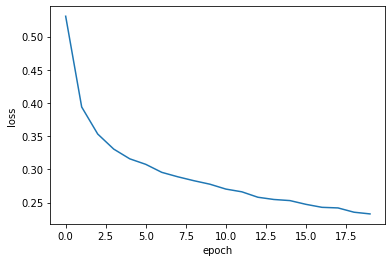

In [12]:
# 적절한 값을 찾아야 하는데, 우리는 지금 훈련 데이터셋의 손실 값만 확인하고 있음
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실
- 검증 데이터셋의 손실 값도 확인해보자.

In [13]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# validation_data에 데이터셋을 전달하면 에포크마다 손실값과 정확도를 반환
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [14]:
# val_loss와 val_accuracy 추가
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


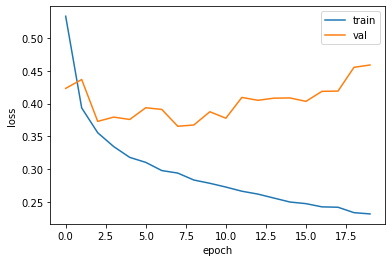

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

# val의 손실 값은 점점 나빠지고 있음 = 과대적합
plt.show()

In [17]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

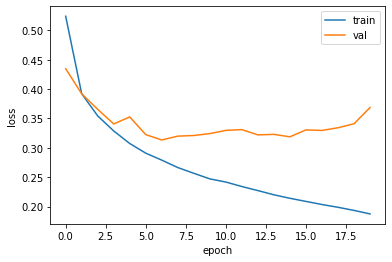

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

- 분류 시 각 샘플을 처리할 때마다 은닉층의 한 뉴런을 랜덤으로 골라 계산에서 제외한다. 그러나 평가 시에는 모든 뉴런을 사용해 모델의 과대 적합을 막는다.

In [19]:
# Dropout으로 사용 가능 -> Layer로 출력됨
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

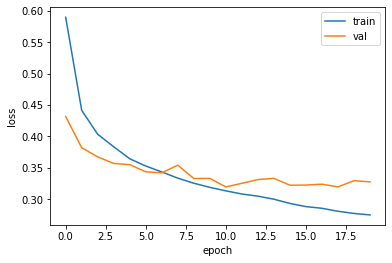

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

# 낮아진 손실 값
plt.show()

## 모델 저장과 복원

- 만든 모델을 저장하고 다시 복원해 사용해야 하는 경우
- `save_weights` : 모델의 구조는 저장하지 않고 가중치만 저장하는 메소드
- `load_weights` : 모델 객체를 불러오는 메소드
- `save` : 모델의 구조를 모두 저장하는 메소드
- `load_model` : `save`로 저장한 모델을 불러옴

In [33]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [43]:
model.save_weights('model-weights.h5')

In [44]:
model.save('model-whole.h5')

In [45]:
!ls -al *.h5

-rw-r--r-- 1 root root 982664 May 19 16:24 best-model.h5
-rw-r--r-- 1 root root 333448 May 19 16:21 model-weight.h5
-rw-r--r-- 1 root root 333448 May 19 16:24 model-weights.h5
-rw-r--r-- 1 root root 982664 May 19 16:24 model-whole.h5


In [46]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

In [47]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# 타겟값과 비교해 정확도 출력
print(np.mean(val_labels == val_target))

0.8868333333333334


In [48]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.8868


[0.32385194301605225, 0.8868333101272583]

## 콜백
- 모델 훈련 과정에서도 지정한 일을 수행할 수 있는 기능
- `ModelCheckpoint`: 가장 낮은 손실 값을 가질 때의 매개변수 값을 출력한다.


In [37]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# best-model.h5에 값이 저장됨
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
# callbacks에 리스트로 전달한다.
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [38]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3172 - accuracy: 0.8839


[0.3172215223312378, 0.8839166760444641]

In [39]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
# 조기종료: 손실 값이 높아지면 굳이 훈련을 진행하지 않고 종료하도록 한다.
# patience: 조기종료 시점으로 무시할 epoch 횟수
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [40]:
print(early_stopping_cb.stopped_epoch)

9


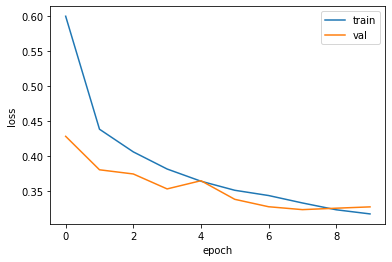

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [42]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.8868


[0.32385194301605225, 0.8868333101272583]